In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import PIL
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

2023-04-30 17:55:41.865184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 17:55:42.043235: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-30 17:55:42.812924: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-30 17:55:42.812986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
csv_file = pd.read_csv('../../files/train_ship_segmentations_v2.csv')
csv_file = csv_file.groupby('ImageId')['EncodedPixels'].apply(list).reset_index()
image_ids, pixels = csv_file['ImageId'].values.tolist(), csv_file['EncodedPixels'].values.tolist()

In [3]:
csv_file['fixed_inputs'] = csv_file['ImageId'].apply(lambda x: '../../files/train_v2/' + x)
csv_file['mask_paths'] = csv_file['ImageId'].apply(lambda x: '../../files/masks_v1/train/' + x.split('.')[0] + '.' + 'png')

In [73]:
img_path = csv_file['fixed_inputs'].values.tolist()[2]

In [80]:
img = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img, channels=3)
img_ = tf.image.adjust_contrast(img, 1.2)

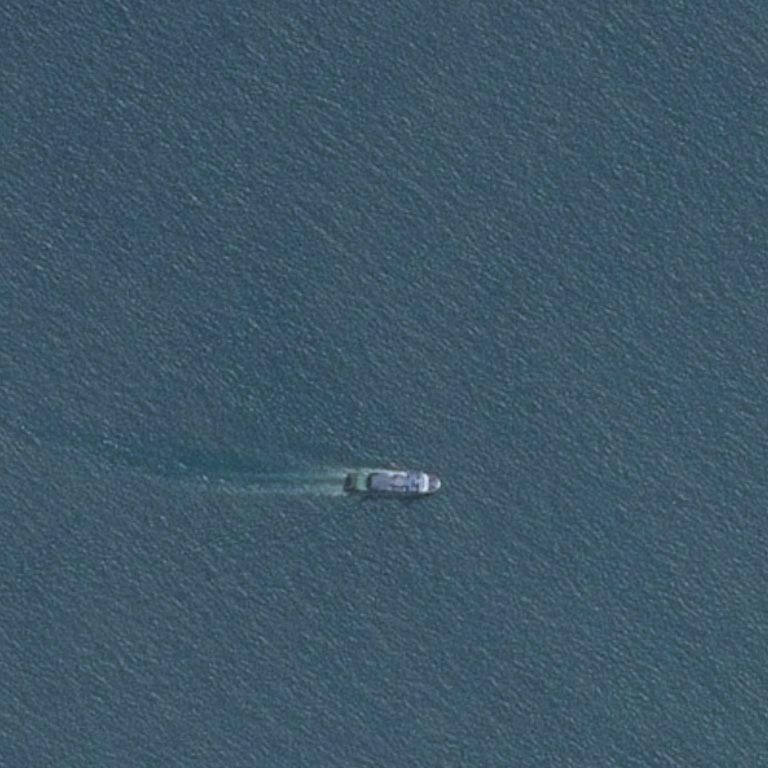

In [81]:
PIL.Image.fromarray(img.numpy())

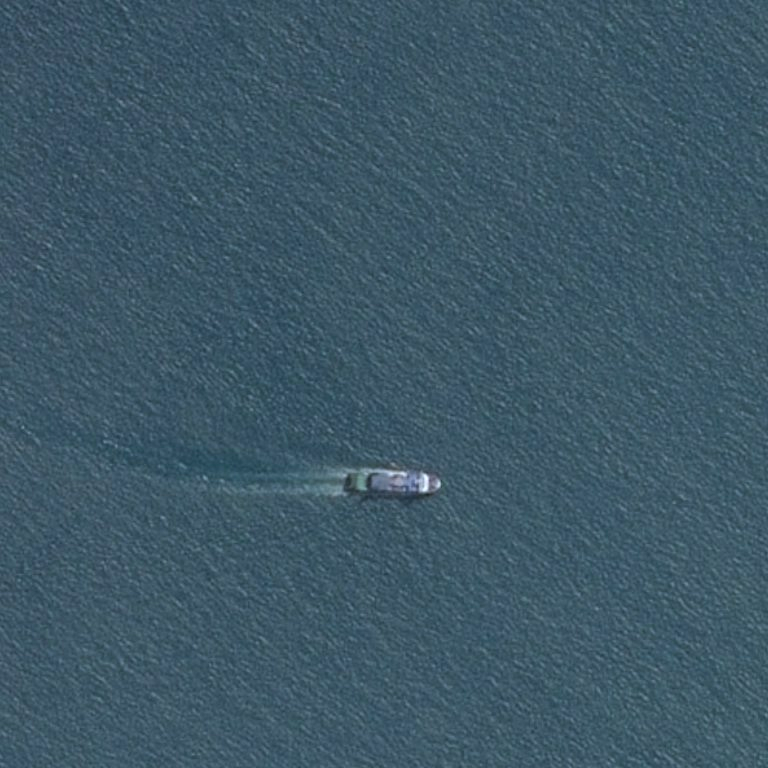

In [82]:
PIL.Image.fromarray(img_.numpy())